# Miscellaneous Becquerel Examples

In [1]:
%pylab inline
import becquerel as bq
from pprint import pprint

Populating the interactive namespace from numpy and matplotlib


# 1. Example: Calculate the mean free path of photons

## 1.1 Mean free path of photons in lead

NIST XCOM data can be queried in `becquerel`, as well as standard properties of elements and materials. Here we query data for lead and use it to calculate the mean free path:

{'formula': 'Pb', 'density': 11.35, 'weight_fractions': ['Pb 1.000000'], 'source': 'NIST (http://physics.nist.gov/PhysRefData/XrayMassCoef/tab1.html)'}
density (g/cm^3): 11.35


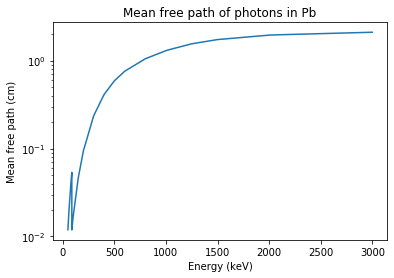

In [2]:
name = 'Pb'

# retrieve materials data
mat_data = bq.materials.fetch_materials()
print(mat_data[name])
density = mat_data[name]["density"]
print('density (g/cm^3):', density)

# retrieve NIST XCOM cross sections
xd = bq.xcom.fetch_xcom_data(name, e_range_kev=[50., 3000.])

# calculate mean free path
mfp_cm = 1 / (density * xd.total_wo_coh.values)

plt.figure()
plt.title('Mean free path of photons in ' + name)
plt.semilogy(xd.energy, mfp_cm)
plt.xlabel('Energy (keV)')
plt.ylabel('Mean free path (cm)')
plt.show()

## 1.2 Mean free path of photons in air

{'formula': '-', 'density': 0.001205, 'weight_fractions': ['C 0.000124', 'N 0.755268', 'O 0.231781', 'Ar 0.012827'], 'source': 'NIST (http://physics.nist.gov/PhysRefData/XrayMassCoef/tab2.html)'}
density (g/cm^3): 0.001205
composition: ['C 0.000124', 'N 0.755268', 'O 0.231781', 'Ar 0.012827']


,energy,coherent,incoherent,photoelec,pair_nuc,pair_elec,total_w_coh,total_wo_coh
0,50.0,0.019050,0.16140,2.755000e-02,0.000000,0.000000,0.20800,0.18890
1,60.0,0.013700,0.15860,1.517000e-02,0.000000,0.000000,0.18750,0.17380
2,80.0,0.008028,0.15230,5.912000e-03,0.000000,0.000000,0.16620,0.15820
3,100.0,0.005254,0.14600,2.846000e-03,0.000000,0.000000,0.15410,0.14890
4,150.0,0.002396,0.13240,7.602000e-04,0.000000,0.000000,0.13560,0.13320
5,200.0,0.001361,0.12170,3.026000e-04,0.000000,0.000000,0.12330,0.12200
6,300.0,0.000610,0.10610,8.603000e-05,0.000000,0.000000,0.10670,0.10610
7,400.0,0.000344,0.09511,3.698000e-05,0.000000,0.000000,0.09549,0.09514
8,500.0,0.000220,0.08688,1.998000e-05,0.000000,0.000000,0.08712,0.08690
9,600.0,0.000153,0.08039,1.246000e-05,0.000000,0.000000,0.08055,0.08040


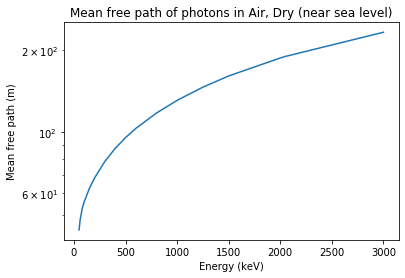

In [3]:
name = 'Air, Dry (near sea level)'

# retrieve materials data
mat_data = bq.materials.fetch_materials()
print(mat_data[name])
density = mat_data[name]["density"]
composition = mat_data[name]["weight_fractions"]
print('density (g/cm^3):', density)
print('composition:', composition)

# retrieve NIST XCOM cross sections
xd = bq.xcom.fetch_xcom_data(composition, e_range_kev=[50., 3000.])
display(xd)

# calculate mean free path
mfp_cm = 1 / (density * xd.total_wo_coh.values)
mfp_m = mfp_cm / 100.

plt.figure()
plt.title('Mean free path of photons in ' + name)
plt.semilogy(xd.energy, mfp_m)
plt.xlabel('Energy (keV)')
plt.ylabel('Mean free path (m)')
plt.show()

# 2. Example: Identifying unknown spectral lines
From the previous spectrum, we see a line around 1408 keV that is not in the background.

In [4]:
spec = bq.Spectrum.from_file('../tests/samples/1110C NAA cave pottery.Spe')
print(spec)
bkg = bq.Spectrum.from_file('../tests/samples/1110C NAA cave background May 2017.spe')
print(bkg)
bkgsub = spec - bkg

SpeFile: Reading file ../tests/samples/1110C NAA cave pottery.Spe
becquerel.Spectrum
    start_time:     2017-04-25 12:54:27
    stop_time:      2017-04-25 17:30:24
    realtime:       16557.0
    livetime:       16543.0
    is_calibrated:  True
    num_bins:       16384
    gross_counts:   (3.047+/-0.006)e+05
    gross_cps:      18.419+/-0.034
    filename:       ../tests/samples/1110C NAA cave pottery.Spe
SpeFile: Reading file ../tests/samples/1110C NAA cave background May 2017.spe
becquerel.Spectrum
    start_time:     2017-04-26 11:05:11
    stop_time:      2017-05-01 12:43:34
    realtime:       437903.0
    livetime:       437817.0
    is_calibrated:  True
    num_bins:       16384
    gross_counts:   (1.0529+/-0.0010)e+06
    gross_cps:      2.4049+/-0.0023
    filename:       ../tests/samples/1110C NAA cave background May 2017.spe


becquerel/core/spectrum.py:815: SpectrumWarning: Subtraction of counts-based specta, spectra have been converted to CPS
  warnings.warn(


becquerel/core/spectrum.py:430: UserWarning: energies_kev is deprecated and will be removed in a future release. Use bin_centers_kev instead.
  warnings.warn('energies_kev is deprecated and will be removed in a '


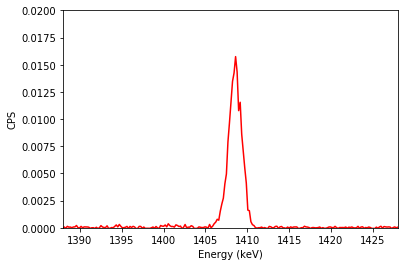

In [5]:
plt.figure()
plt.plot(bkgsub.energies_kev, bkgsub.cps_vals, 'r-')
plt.xlim(1388, 1428)
plt.ylim(0, 0.02)
plt.xlabel('Energy (keV)')
plt.ylabel('CPS')
plt.show()

Which isotope in the sample could be producing this line?

In [6]:
rad = bq.nndc.fetch_decay_radiation(
    type='Gamma',
    e_range=[1405, 1410],
    i_range=[5, None],  # at least 5% branching
    t_range=[3600, None],  # half-life >= 1 hour
    elevel_range=(0, 0),  # ground states only
)
cols = ['Z', 'Element', 'A', 'Decay Mode', 'Radiation', 'Radiation Energy (keV)',
        'Radiation Intensity (%)', 'Energy Level (MeV)']
display(rad[cols])

,Z,Element,A,Decay Mode,Radiation,Radiation Energy (keV),Radiation Intensity (%),Energy Level (MeV)
0,27,CO,55,EC,G,1408.50+/-0.30,16.9+/-0.8,0.0
1,63,EU,152,EC,G,1408.0130+/-0.0030,20.87+/-0.09,0.0


Let's first consider Co-55. Are there other lines from that isotope present in the spectrum?

In [7]:
rad = bq.nndc.fetch_decay_radiation(
    nuc='Co-55',
    type='Gamma',
    i_range=(1, None),  # at least 1% branching
    e_range=(100, None),  # energy >= 100 keV
    elevel_range=(0, 0),  # ground states only
)
display(rad[cols])

,Z,Element,A,Decay Mode,Radiation,Radiation Energy (keV),Radiation Intensity (%),Energy Level (MeV)
0,27,CO,55,EC,G,411.50+/-0.30,1.07+/-0.08,0.0
1,27,CO,55,EC,G,477.20+/-0.20,20.2+/-1.7,0.0
2,27,CO,55,EC,G,511.0,152+/-7,0.0
3,27,CO,55,EC,G,803.70+/-0.20,1.87+/-0.15,0.0
4,27,CO,55,EC,G,931.10+/-0.30,75.0,0.0
5,27,CO,55,EC,G,1316.60+/-0.30,7.10+/-0.30,0.0
6,27,CO,55,EC,G,1370.00+/-0.30,2.90+/-0.30,0.0
7,27,CO,55,EC,G,1408.50+/-0.30,16.9+/-0.8,0.0


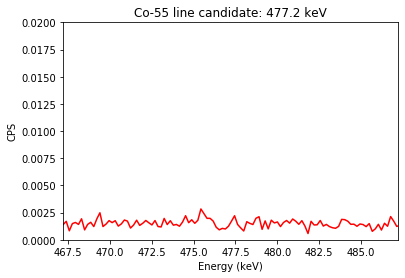

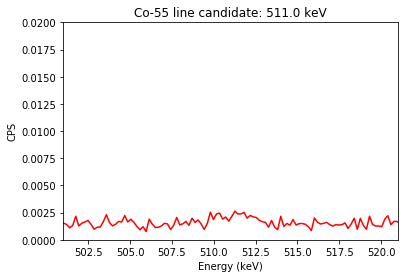

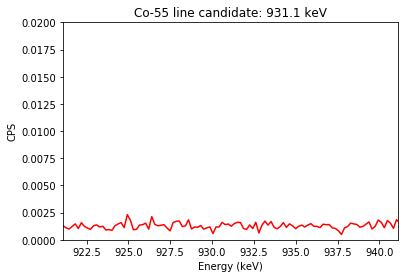

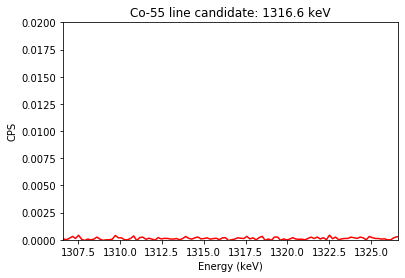

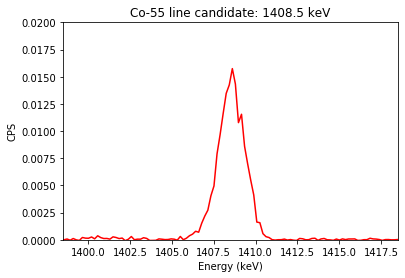

In [8]:
energies = rad['Radiation Energy (keV)'][rad['Radiation Intensity (%)'] > 5]
for en in energies:
    try:
        en = en.nominal_value
    except:
        pass
    plt.figure()
    plt.title('Co-55 line candidate: {:.1f} keV'.format(en))
    plt.plot(bkgsub.energies_kev, bkgsub.cps_vals, 'r-')
    plt.xlim(en - 10, en + 10)
    plt.ylim(0, 0.02)
    plt.xlabel('Energy (keV)')
    plt.ylabel('CPS')

Those lines are not present. Let's examine Eu-152:

In [9]:
rad = bq.nndc.fetch_decay_radiation(
    nuc='Eu-152',
    type='Gamma',
    i_range=(1, None),
    e_range=(100, None),
    elevel_range=(0, 0),  # ground states only
)
display(rad[cols])

,Z,Element,A,Decay Mode,Radiation,Radiation Energy (keV),Radiation Intensity (%),Energy Level (MeV)
4,63,EU,152,EC,G,121.78170+/-0.00030,28.53+/-0.16,0.0
5,63,EU,152,EC,G,244.6974+/-0.0008,7.55+/-0.04,0.0
6,63,EU,152,B-,G,344.2785+/-0.0012,26.59+/-0.20,0.0
7,63,EU,152,B-,G,411.1165+/-0.0012,2.237+/-0.013,0.0
8,63,EU,152,EC,G,443.9606+/-0.0016,2.827+/-0.014,0.0
9,63,EU,152,B-,G,778.9045+/-0.0024,12.93+/-0.08,0.0
10,63,EU,152,EC,G,867.3800+/-0.0030,4.230+/-0.030,0.0
11,63,EU,152,EC,G,964.057+/-0.005,14.51+/-0.07,0.0
12,63,EU,152,EC,G,1085.837+/-0.010,10.11+/-0.05,0.0
13,63,EU,152,B-,G,1089.737+/-0.005,1.734+/-0.011,0.0


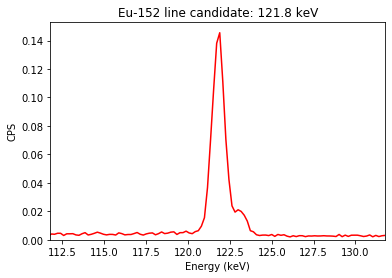

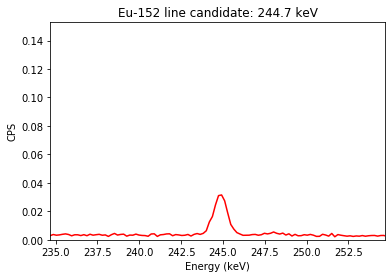

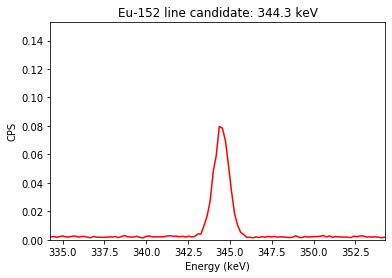

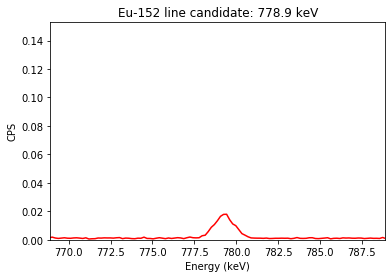

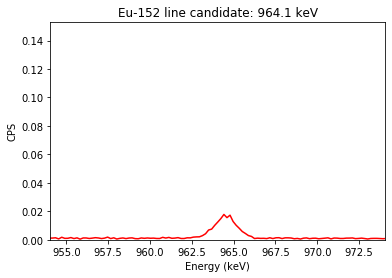

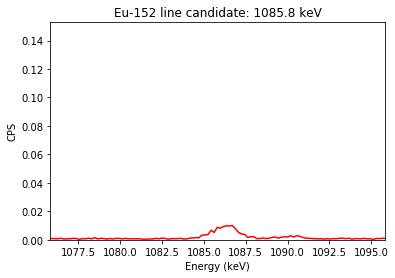

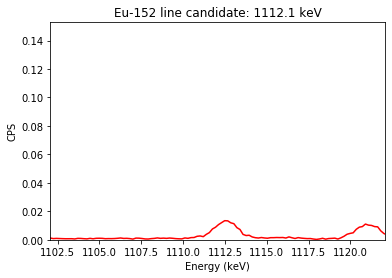

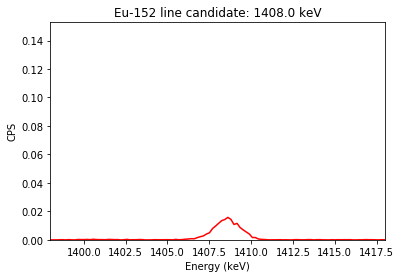

In [10]:
energies = rad['Radiation Energy (keV)'][rad['Radiation Intensity (%)'] > 5]
for en in energies:
    try:
        en = en.nominal_value
    except:
        pass
    plt.figure()
    plt.title('Eu-152 line candidate: {:.1f} keV'.format(en))
    plt.plot(bkgsub.energies_kev, bkgsub.cps_vals, 'r-')
    plt.xlim(en - 10, en + 10)
    plt.ylim(0)
    plt.xlabel('Energy (keV)')
    plt.ylabel('CPS')

Eu-152 looks like a good match.

# 3. Example: Activity of a 40 lb bag of KCl salt

In [11]:
# calculate number of K atoms in the sample
from scipy.constants import physical_constants
AMU = physical_constants['unified atomic mass unit'][0]

K = bq.Element('Potassium')
Cl = bq.Element('Cl')

mass = 18.1  # kg
mass_K = mass * K.atomic_mass / (K.atomic_mass + Cl.atomic_mass)
n_K = mass_K / AMU / K.atomic_mass
print('total mass: {:.2f} kg'.format(mass))
print('mass of K:  {:.2f} kg'.format(mass_K))
print('number of K nuclei: {:.2e}'.format(n_K))

total mass: 18.10 kg
mass of K:  9.49 kg
number of K nuclei: 1.46e+26


In [12]:
# calculate number of K-40 nuclei
K40 = bq.Isotope('K-40')
print('K-40 abundance: {:.4f}%'.format(K40.abundance))
n_K40 = n_K * K40.abundance.nominal_value / 100
print('number of K-40 nuclei: {:.2e}'.format(n_K40))

K-40 abundance: 0.0117+/-0.0001%
number of K-40 nuclei: 1.71e+22


In [13]:
# determine activity of K-40
# n(t) = n0 2^(-t / hl) = n0 exp(-t ln(2) / hl)
# dn/dt = -n0 ln(2) / hl exp(-t ln(2) / hl)
print('half-life: {:.3e} s'.format(K40.half_life))
print('half-life: {:.3e} y'.format(K40.half_life / (3600 * 24 * 365)))

activity_Bq = n_K40 * np.log(2) / K40.half_life  # could also use n_K40 * K40.decay_constant
print('activity: {:.2e} Bq'.format(activity_Bq))
activity_uCi = activity_Bq / 3.7e4
print('activity: {:.2e} uCi'.format(activity_uCi))

half-life: 3.938e+16 s
half-life: 1.249e+09 y
activity: 3.01e+05 Bq
activity: 8.14e+00 uCi
